<a href="https://colab.research.google.com/github/tawounfouet/road-to-deeplearning-mastery/blob/main/NLP_based_Movie_Recomendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NLP-based Movie Recomendation


## Context
Recommendation systems are used everywhere now a days. Netflix , Amazon Prime , YouTube , Online shopping sites etc. Datasets like this are great way to start working on Recommendation system.
The Dataset was created from the official API provied by TMDB

## Content
What's inside is more than just rows and columns. This is the dataset for 10000 Popular movies based on the TMDB ratings. Ideal database to start off with Recommendation algorithms.

In [ ]:
# https://www.tensorflow.org/hub/tutorials/semantic_similarity_with_tf_hub_universal_encoder?hl=fr

In [4]:
# Import tensorflow and hub
import tensorflow as tf
import tensorflow_hub as hub


# plotting
import matplotlib.pyplot as plt

# some important packages
import os
import re
from absl import logging
import numpy as np
import pandas as pd

# scikit-learn
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA


## Dataset

imbd website : https://www.imdb.com/


- Kaggle : https://www.kaggle.com/datasets/moazeldsokyx/imdb-top-10000-movies-dataset
- Top 10000 IMBD Dataset : https://raw.githubusercontent.com/tawounfouet/road-to-deeplearning-mastery/main/data/Top_10000_Movies_IMDb.csv


- Kaggle : https://www.kaggle.com/datasets/omkarborikar/top-10000-popular-movies
- Top popular movies : https://raw.githubusercontent.com/tawounfouet/road-to-deeplearning-mastery/main/data/Top_10000_Movies.csv

In [27]:
!wget  https://raw.githubusercontent.com/tawounfouet/road-to-deeplearning-mastery/main/data/Top_10000_Movies.csv

--2024-03-10 13:43:35--  https://raw.githubusercontent.com/tawounfouet/road-to-deeplearning-mastery/main/data/Top_10000_Movies.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4106528 (3.9M) [text/plain]
Saving to: ‘Top_10000_Movies.csv’

Top_10000_Movies.cs 100%[===================>]   3.92M  --.-KB/s    in 0.08s   

2024-03-10 13:43:35 (49.4 MB/s) - ‘Top_10000_Movies.csv’ saved [4106528/4106528]



In [5]:
module_url = "https://tfhub.dev/google/universal-sentence-encoder/4"

model = hub.load(module_url)
print ("module %s loaded" % module_url)

module https://tfhub.dev/google/universal-sentence-encoder/4 loaded


In [13]:
def embed(texts):
  return model(texts)

In [17]:
# embed(["this movie was great"])

In [20]:
movies_df = pd.read_csv('https://raw.githubusercontent.com/tawounfouet/road-to-deeplearning-mastery/main/data/Top_10000_Movies_IMDb.csv')
movies_df.head(5)

,ID,Movie Name,Rating,Runtime,Genre,Metascore,Plot,Directors,Stars,Votes,Gross,Link
0,1,The Shawshank Redemption,9.3,142 min,Drama,82.0,"Over the course of several years, two convicts...","['Frank Darabont', 'Tim Robbins', 'Morgan Free...","['Tim Robbins', 'Morgan Freeman', 'Bob Gunton'...",2752419,28341469,https://www.imdb.com/title/tt0111161/
1,2,The Godfather,9.2,175 min,"Crime, Drama",100.0,"Don Vito Corleone, head of a mafia family, dec...","['Francis Ford Coppola', 'Marlon Brando', 'Al ...","['Marlon Brando', 'Al Pacino', 'James Caan', '...",1914751,134966411,https://www.imdb.com/title/tt0068646/
2,3,Ramayana: The Legend of Prince Rama,9.2,135 min,"Animation, Action, Adventure",NaN,An anime adaptation of the Hindu epic the Rama...,"['Ram Mohan', 'Yûgô Sakô', 'Koichi Saski', 'Ar...","['Yûgô Sakô', 'Koichi Saski', 'Arun Govil', 'N...",10108,10108,https://www.imdb.com/title/tt0259534/
3,4,The Chaos Class,9.2,87 min,"Comedy, Drama",NaN,"Lazy, uneducated students share a very close b...","['Ertem Egilmez', 'Kemal Sunal', 'Münir Özkul'...","['Kemal Sunal', 'Münir Özkul', 'Halit Akçatepe...",41785,41785,https://www.imdb.com/title/tt0252487/
4,5,Daman,9.1,121 min,"Adventure, Drama",NaN,"The film is set in 2015. Sid, is a young docto...","['Lenka Debiprasad', 'Vishal Mourya', 'Karan K...","['Vishal Mourya', 'Karan Kandhapan', 'Babushan...",13303,13303,https://www.imdb.com/title/tt17592606/


In [22]:
movies_df.shape

(9999, 12)

In [33]:
import pandas as pd

# Specify the file path and delimiter
csv_file_path = 'Top_10000_Movies.csv'
# delimiter = ','  # Adjust the delimiter if necessary

# Read the CSV file into a pandas DataFrame
top_movies_df = pd.read_csv(csv_file_path, lineterminator='\n')
print(top_movies_df.shape)
top_movies_df.head()

(10000, 13)


,Unnamed: 0,id,original_language,original_title,popularity,release_date,vote_average,vote_count,genre,overview,revenue,runtime,tagline
0,0,580489,en,Venom: Let There Be Carnage,5401.308,2021-09-30,6.8,1736,"['Science Fiction', 'Action', 'Adventure']",After finding a host body in investigative rep...,424000000,97.0,NaN
1,1,524434,en,Eternals,3365.535,2021-11-03,7.1,622,"['Action', 'Adventure', 'Science Fiction', 'Fa...",The Eternals are a team of ancient aliens who ...,165000000,157.0,In the beginning...
2,2,438631,en,Dune,2911.423,2021-09-15,8.0,3632,"['Action', 'Adventure', 'Science Fiction']","Paul Atreides, a brilliant and gifted young ma...",331116356,155.0,"Beyond fear, destiny awaits."
3,3,796499,en,Army of Thieves,2552.437,2021-10-27,6.9,555,"['Action', 'Crime', 'Thriller']",A mysterious woman recruits bank teller Ludwig...,0,127.0,"Before Vegas, one locksmith became a legend."
4,4,550988,en,Free Guy,1850.470,2021-08-11,7.8,3493,"['Comedy', 'Action', 'Adventure', 'Science Fic...",A bank teller called Guy realizes he is a back...,331096766,115.0,Life's too short to be a background character.


In [35]:
top_movies_df.columns

Index(['Unnamed: 0', 'id', 'original_language', 'original_title', 'popularity',
       'release_date', 'vote_average', 'vote_count', 'genre', 'overview',
       'revenue', 'runtime', 'tagline'],
      dtype='object')

In [39]:
df= top_movies_df[['original_title', 'overview', "revenue"]]
df.head(2)

,original_title,overview,revenue
0,Venom: Let There Be Carnage,After finding a host body in investigative rep...,424000000
1,Eternals,The Eternals are a team of ancient aliens who ...,165000000


In [40]:
df = df.dropna()
df = df.reset_index()
df = df[:5500]

In [44]:
title = list(df["overview"])
title[:5]

['After finding a host body in investigative reporter Eddie Brock, the alien symbiote must face a new enemy, Carnage, the alter ego of serial killer Cletus Kasady.',
 'The Eternals are a team of ancient aliens who have been living on Earth in secret for thousands of years. When an unexpected tragedy forces them out of the shadows, they are forced to reunite against mankind’s most ancient enemy, the Deviants.',
 "Paul Atreides, a brilliant and gifted young man born into a great destiny beyond his understanding, must travel to the most dangerous planet in the universe to ensure the future of his family and his people. As malevolent forces explode into conflict over the planet's exclusive supply of the most precious resource in existence-a commodity capable of unlocking humanity's greatest potential-only those who can conquer their fear will survive.",
 'A mysterious woman recruits bank teller Ludwig Dieter to lead a group of aspiring thieves on a top-secret heist during the early stages 

In [46]:
embeddings = embed(title)
print(f'The embeddings shape is {embeddings.shape}')

The embeddings shape is (5500, 512)


In [47]:
pca = PCA(n_components=2)
emb_2d = pca.fit_transform(embeddings)

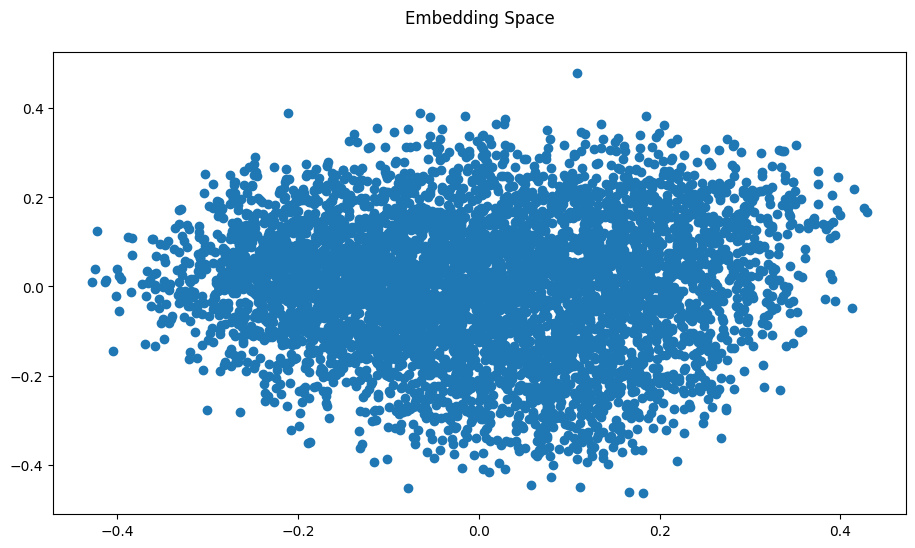

In [50]:
plt.figure(figsize=(11, 6))
plt.title("Embedding Space\n")
plt.scatter(emb_2d[:, 0], emb_2d[:, 1]);

In [52]:
nn = NearestNeighbors(n_neighbors=10)
nn.fit(embeddings)

NearestNeighbors(n_neighbors=10)

In [57]:
def recommend(text):
  emb = embed([text])
  neighbors = nn.kneighbors(emb, return_distance=False)[0]

  return df['original_title'].iloc[neighbors].tolist()

In [62]:
print("Recommended Movies")

recommend("GTA")

Recommended Movies


['Free Guy',
 'Lucky Number Slevin',
 'Bad Boys II',
 'Scooby-Doo! and the Cyber Chase',
 'Army of the Dead',
 'Masterminds',
 'Bandidas',
 'Sleepless',
 "Ocean's Twelve",
 'Batman: The Long Halloween, Part Two']

In [ ]:
# https://projector.tensorflow.org/
# source : https://github.com/pritishmishra703/Deep-Learning-From-Neurons-to-GANs/blob/master/Chapter8_DataAug.ipynb
# youtube : https://www.youtube.com/watch?v=pvY0BmAFxwg